## Natural Intelligence Systems
### Data Scientist Technical Assessment
### Meghan Edgerton

### Part 1

For this task, I was asked to create ten datasets using Sci-kit learn's make_classification api and fit optimized Lasso models to each of them.

All of the necessary packages and modules used for this task are imported in the following cell.

In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV

## Data Generation

Using the sklearn.datasets.make_classification() api, I created ten datasets, increasing the class separation value by 2.0 for each dataset but keeping all of the rest of the parameters as their default values. I chose to start with a class separation value at 1.0, the default setting, to be able to get an idea of what the make_classification function creates without customization. To get a better grasp of how this parameter effects the datasets it creates, I continuously increased the value by 2.0 so that all of the datasets would have a class separation value that was an odd number.

This created ten datasets that consist of 100 rows and 20 columns of attributes, and one column of a target variable. 

In [2]:
class_seps = np.linspace(1,19,10)

x1,y1 = make_classification(class_sep=1.0)
x2,y2 = make_classification(class_sep=3.0)
x3,y3 = make_classification(class_sep=5.0)
x4,y4 = make_classification(class_sep=7.0)
x5,y5 = make_classification(class_sep=9.0)
x6,y6 = make_classification(class_sep=11.0)
x7,y7 = make_classification(class_sep=13.0)
x8,y8 = make_classification(class_sep=15.0)
x9,y9 = make_classification(class_sep=17.0)
x10,y10 = make_classification(class_sep=19.0)


## Exploratory Data Analysis

After creating the ten datasets, I made scatter plots of the first two attributes in each set. As can be seen from the plots below, some of the datasets follow similar patterns while others vary substantially. 

Text(0.5, 1.0, 'Class_sep: 19.0')

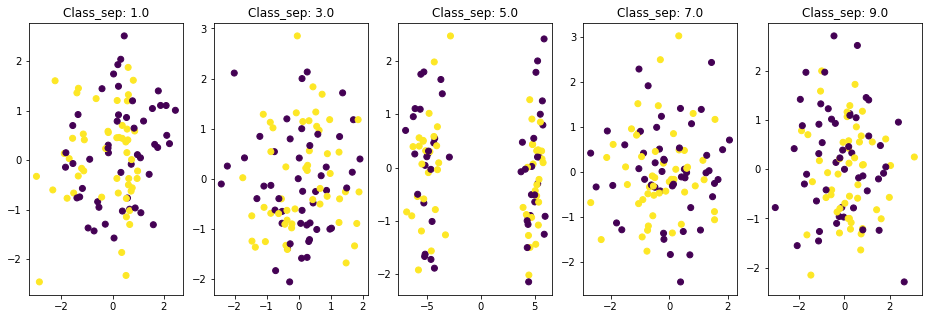

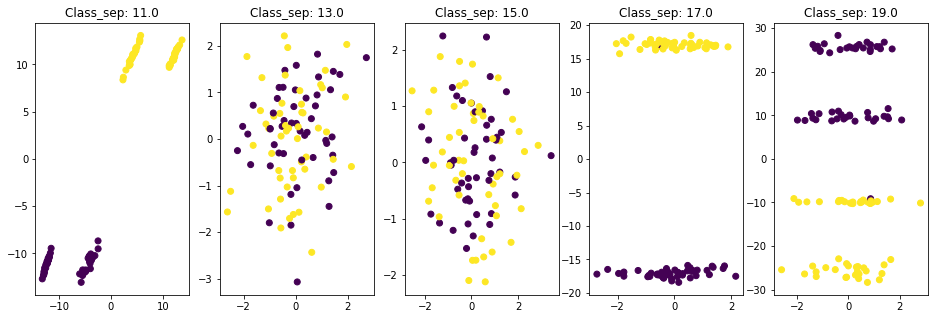

In [3]:
## Plotting datasets
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(16,5))
plt.subplot(151)
plt.scatter(x1[:,0],x1[:,1],c=y1)
plt.title('Class_sep: '+str(1.0))

plt.subplot(152)
plt.scatter(x2[:,0],x2[:,1],c=y2)
plt.title('Class_sep: '+str(3.0))

plt.subplot(153)
plt.scatter(x3[:,0],x3[:,1],c=y3)
plt.title('Class_sep: '+str(5.0))

plt.subplot(154)
plt.scatter(x4[:,0],x4[:,1],c=y4)
plt.title('Class_sep: '+str(7.0))

plt.subplot(155)
plt.scatter(x5[:,0],x5[:,1],c=y5)
plt.title('Class_sep: '+str(9.0))

fig2 = plt.subplots(nrows=1,ncols=5,figsize=(16,5))

plt.subplot(151)
plt.scatter(x6[:,0],x6[:,1],c=y6)
plt.title('Class_sep: '+str(11.0))

plt.subplot(152)
plt.scatter(x7[:,0],x7[:,1],c=y7)
plt.title('Class_sep: '+str(13.0))

plt.subplot(153)
plt.scatter(x8[:,0],x8[:,1],c=y8)
plt.title('Class_sep: '+str(15.0))

plt.subplot(154)
plt.scatter(x9[:,0],x9[:,1],c=y9)
plt.title('Class_sep: '+str(17.0))

plt.subplot(155)
plt.scatter(x10[:,0],x10[:,1],c=y10)
plt.title('Class_sep: '+str(19.0))

In [4]:
## Combining the datasets into attribute-only and target variable-only sets
X = np.hstack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
Y = np.vstack((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10)).transpose()

To get some better insight, I computed summary statistics of each of the generated datasets. I chose to compute the mean, standard deviation, variance, minimum, maximum, kurtosis, and skewness (standardized z-score), and formatted all of these statistics into the table presented below.

In [5]:
## Summary stats of the datasets 
means = []
stds = []
var = []
mins = []
maxs = []
dataset = []
kurt = []
skew = []



means = means + [np.mean(x1),np.mean(x2),np.mean(x3),np.mean(x4),np.mean(x5),np.mean(x6),np.mean(x7),np.mean(x8),np.mean(x9),np.mean(x10)]
stds = stds + [np.std(x1),np.std(x2),np.std(x3),np.std(x4),np.std(x5),np.std(x6),np.std(x7),np.std(x8),np.std(x9),np.std(x10)]
var = var + [np.var(x1),np.var(x2),np.var(x3),np.var(x4),np.var(x5),np.var(x6),np.var(x7),np.var(x8),np.var(x9),np.var(x10)]
mins = mins + [np.min(x1),np.min(x2),np.min(x3),np.min(x4),np.min(x5),np.min(x6),np.min(x7),np.min(x8),np.min(x9),np.min(x10)]
maxs = maxs +[np.max(x1),np.max(x2),np.max(x3),np.max(x4),np.max(x5),np.max(x6),np.max(x7),np.max(x8),np.max(x9),np.max(x10)]
kurt = kurt + [st.kurtosis(x1),st.kurtosis(x2),st.kurtosis(x3),st.kurtosis(x4),st.kurtosis(x5),st.kurtosis(x6),st.kurtosis(x7),st.kurtosis(x8),st.kurtosis(x9),st.kurtosis(x10)]
skew = skew + [st.skew(x1),st.skew(x2),st.skew(x3),st.skew(x4),st.skew(x5),st.skew(x6),st.skew(x7),st.skew(x8),st.skew(x9),st.skew(x10)]
dataset = [1,2,3,4,5,6,7,8,9,10]
mean = np.array(means)
std = np.array(stds)
variance = np.array(var)
minimum = np.array(mins)
maximum = np.array(maxs)
kurtosis = np.array(kurt)
skewness = np.array(skew)
datasets = np.array(dataset)

stats = np.vstack((datasets,mean,std,variance,minimum,maximum,kurtosis[:,0],skewness[:,0])).transpose()
df = pd.DataFrame(stats, columns = ['Dataset','Means','Standard Deviations','Variances','Minimums','Maximums','Kurtosis','Skewness'])
df = df.style.hide_index()
df

Dataset,Means,Standard Deviations,Variances,Minimums,Maximums,Kurtosis,Skewness
1,0.013726,1.0246,1.0498,-3.34588,3.74638,-0.306297,-0.388594
2,-0.00654639,1.70035,2.89119,-7.02359,6.20159,-0.296007,-0.194539
3,-0.00929303,2.07843,4.31988,-7.25235,7.52417,-1.90892,-0.0318998
4,0.00710173,3.22037,10.3708,-11.8273,11.0287,-0.340459,-0.186749
5,-0.0225671,3.45613,11.9449,-11.7966,11.2551,-0.0589786,0.0202726
6,0.0296863,4.21633,17.7775,-13.2436,13.7283,-1.38002,0.00590658
7,0.031664,5.64408,31.8557,-17.5909,18.05,-0.0747331,0.00125051
8,0.00417476,6.30533,39.7572,-18.1657,19.8618,-0.0251209,0.139522
9,-0.0101775,6.16442,38.0001,-18.6077,18.4856,-0.172959,-0.156552
10,-0.0139905,7.65651,58.6221,-28.348,28.366,-0.330672,-0.245265


The table of descriptive statistics shows that the datasets have fairly similar means. However, the rest of the statistics vary significantly. It is noticeable that the standard deviation, variance, and range of data increases as the class separation value increases. The kurtosis and skewness values vary, but don't seem to follow a particular trend. 

Before moving on to the next steps in this process, I confirmed that there were no null values (NaNs) in each dataset and that the dimensions of each dataset were the same.

In [6]:
X_combined = pd.DataFrame(X)
Y_combined = pd.DataFrame(Y)
print(X_combined.isnull().sum())
print(Y_combined.isnull().sum())
print('Total Number of NaNs in the attributes dataset: ',X_combined.isnull().sum().sum())
print('Total Number of NaNs in the target variables dataset: ',Y_combined.isnull().sum().sum())


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64
Total Number of NaNs in the attributes dataset:  0
Total Number of NaNs in the target variables dataset:  0


In [7]:
print('x1 shape: ',x1.shape)
print('x2 shape: ',x2.shape)
print('x3 shape: ',x3.shape)
print('x4 shape: ',x4.shape)
print('x5 shape: ',x5.shape)
print('x6 shape: ',x6.shape)
print('x7 shape: ',x7.shape)
print('x8 shape: ',x8.shape)
print('x9 shape: ',x9.shape)
print('x10 shape: ',x10.shape)
print(' ')
print('y1 shape: ', y1.shape)
print('y2 shape: ', y2.shape)
print('y3 shape: ', y3.shape)
print('y4 shape: ', y4.shape)
print('y5 shape: ', y5.shape)
print('y6 shape: ', y6.shape)
print('y7 shape: ', y7.shape)
print('y8 shape: ', y8.shape)
print('y9 shape: ', y9.shape)
print('y10 shape: ', y10.shape)


x1 shape:  (100, 20)
x2 shape:  (100, 20)
x3 shape:  (100, 20)
x4 shape:  (100, 20)
x5 shape:  (100, 20)
x6 shape:  (100, 20)
x7 shape:  (100, 20)
x8 shape:  (100, 20)
x9 shape:  (100, 20)
x10 shape:  (100, 20)
 
y1 shape:  (100,)
y2 shape:  (100,)
y3 shape:  (100,)
y4 shape:  (100,)
y5 shape:  (100,)
y6 shape:  (100,)
y7 shape:  (100,)
y8 shape:  (100,)
y9 shape:  (100,)
y10 shape:  (100,)


## Splitting Data into Training and Testing Sets

After exploring the data, I split each dataset into training and testing sets. I decided to use 80% of the data for training and 20% of the data for testing. For each dataset, I used the same random seed number for consistency. The shapes of the training and testing sets were checked to confirm that they had the same dimensions as well.

In [8]:
randseed = 282

# Dataset 1
x1train, x1test, y1train, y1test = train_test_split(x1,y1,test_size = 0.20,random_state=randseed)
print('X1 train shape: ', x1train.shape, 'Y1 train shape: ',y1train.shape)
print('X1 test shape: ', x1test.shape, 'Y1 test shape: ', y1test.shape)
print(' ')

# Dataset 2
x2train, x2test, y2train, y2test = train_test_split(x2,y2,test_size = 0.20,random_state=randseed)
print('X2 train shape: ', x2train.shape, 'Y2 train shape: ',y2train.shape)
print('X2 test shape: ', x2test.shape, 'Y2 test shape: ', y2test.shape)
print(' ')


# Dataset 3
x3train, x3test, y3train, y3test = train_test_split(x3,y3,test_size = 0.20,random_state=randseed)
print('X3 train shape: ', x3train.shape, 'Y3 train shape: ',y3train.shape)
print('X3 test shape: ', x3test.shape, 'Y3 test shape: ', y3test.shape)
print(' ')


# Dataset 4
x4train, x4test, y4train, y4test = train_test_split(x4,y4,test_size = 0.20,random_state=randseed)
print('X4 train shape: ', x4train.shape, 'Y4 train shape: ',y4train.shape)
print('X4 test shape: ', x4test.shape, 'Y4 test shape: ', y4test.shape)
print(' ')


# Dataset 5
x5train, x5test, y5train, y5test = train_test_split(x5,y5,test_size = 0.20,random_state=randseed)
print('X5 train shape: ', x5train.shape, 'Y5 train shape: ',y5train.shape)
print('X5 test shape: ', x5test.shape, 'Y5 test shape: ', y5test.shape)
print(' ')


# Dataset 6
x6train, x6test, y6train, y6test = train_test_split(x6,y6,test_size = 0.20,random_state=randseed)
print('X6 train shape: ', x6train.shape, 'Y6 train shape: ',y6train.shape)
print('X6 test shape: ', x6test.shape, 'Y6 test shape: ', y6test.shape)
print(' ')


# Dataset 7
x7train, x7test, y7train, y7test = train_test_split(x7,y7,test_size = 0.20,random_state=randseed)
print('X7 train shape: ', x7train.shape, 'Y7 train shape: ',y7train.shape)
print('X7 test shape: ', x7test.shape, 'Y7 test shape: ', y7test.shape)
print(' ')


# Dataset 8
x8train, x8test, y8train, y8test = train_test_split(x8,y8,test_size = 0.20,random_state=randseed)
print('X8 train shape: ', x8train.shape, 'Y8 train shape: ',y8train.shape)
print('X8 test shape: ', x8test.shape, 'Y8 test shape: ', y8test.shape)
print(' ')


# Dataset 9
x9train, x9test, y9train, y9test = train_test_split(x9,y9,test_size = 0.20,random_state=randseed)
print('X9 train shape: ', x9train.shape, 'Y9 train shape: ',y9train.shape)
print('X9 test shape: ', x9test.shape, 'Y9 test shape: ', y9test.shape)
print(' ')


# Dataset 10
x10train, x10test, y10train, y10test = train_test_split(x10,y10,test_size = 0.20,random_state=randseed)
print('X10 train shape: ', x10train.shape, 'Y10 train shape: ',y10train.shape)
print('X10 test shape: ', x10test.shape, 'Y10 test shape: ', y10test.shape)


X1 train shape:  (80, 20) Y1 train shape:  (80,)
X1 test shape:  (20, 20) Y1 test shape:  (20,)
 
X2 train shape:  (80, 20) Y2 train shape:  (80,)
X2 test shape:  (20, 20) Y2 test shape:  (20,)
 
X3 train shape:  (80, 20) Y3 train shape:  (80,)
X3 test shape:  (20, 20) Y3 test shape:  (20,)
 
X4 train shape:  (80, 20) Y4 train shape:  (80,)
X4 test shape:  (20, 20) Y4 test shape:  (20,)
 
X5 train shape:  (80, 20) Y5 train shape:  (80,)
X5 test shape:  (20, 20) Y5 test shape:  (20,)
 
X6 train shape:  (80, 20) Y6 train shape:  (80,)
X6 test shape:  (20, 20) Y6 test shape:  (20,)
 
X7 train shape:  (80, 20) Y7 train shape:  (80,)
X7 test shape:  (20, 20) Y7 test shape:  (20,)
 
X8 train shape:  (80, 20) Y8 train shape:  (80,)
X8 test shape:  (20, 20) Y8 test shape:  (20,)
 
X9 train shape:  (80, 20) Y9 train shape:  (80,)
X9 test shape:  (20, 20) Y9 test shape:  (20,)
 
X10 train shape:  (80, 20) Y10 train shape:  (80,)
X10 test shape:  (20, 20) Y10 test shape:  (20,)


## Building Lasso Models and Finding Predictions for the Test Sets

For the next step in this process, I began building the Lasso Regression model. I decided to keep the alpha value as it's default to compare the results before and after tuning the model. 

For each dataset, I fit the Lasso model to the training set for the attributes and target variable, preprocessing the attributes using the Sci-kit learn's preprocessing.scale() function. This function centers the data to the mean, standardizing the dataset. Then, I used the fitted Lasso model to the training and testing sets and calculated the mean squared error (MSE) between the target sets and the predictions.

In [9]:
# keeping alpha as default to gauge how it does
model = Lasso(alpha = 1.0)
mse_train = []
mse_test = []

In [10]:
## DATASET 1

model.fit(scale(x1train),y1train)

x1pred_train = model.predict(x1train)
x1pred_test = model.predict(x1test)

mse1_train = mean_squared_error(y1train,x1pred_train)
mse1_test = mean_squared_error(y1test,x1pred_test)
mse_train.append(mse1_train)
mse_test.append(mse1_test)


In [11]:
## DATASET 2
model.fit(scale(x2train),y2train)

x2pred_train = model.predict(x2train)
x2pred_test = model.predict(x2test)

mse2_train = mean_squared_error(y2train,x2pred_train)
mse2_test = mean_squared_error(y2test,x2pred_test)
mse_train.append(mse2_train)
mse_test.append(mse2_test)


In [12]:
## DATASET 3
model.fit(scale(x3train),y3train)

x3pred_train = model.predict(x3train)
x3pred_test = model.predict(x3test)

mse3_train = mean_squared_error(y3train,x3pred_train)
mse3_test = mean_squared_error(y3test,x3pred_test)
mse_train.append(mse3_train)
mse_test.append(mse3_test)


In [13]:
## DATASET 4
model.fit(scale(x4train),y4train)

x4pred_train = model.predict(x4train)
x4pred_test = model.predict(x4test)

mse4_train = mean_squared_error(y4train,x4pred_train)
mse4_test = mean_squared_error(y4test,x4pred_test)
mse_train.append(mse4_train)
mse_test.append(mse4_test)


In [14]:
## DATASET 5
model.fit(scale(x5train),y5train)

x5pred_train = model.predict(x5train)
x5pred_test = model.predict(x5test)

mse5_train = mean_squared_error(y5train,x5pred_train)
mse5_test = mean_squared_error(y5test,x5pred_test)
mse_train.append(mse5_train)
mse_test.append(mse5_test)


In [15]:
## DATASET 6
model.fit(scale(x6train),y6train)

x6pred_train = model.predict(x6train)
x6pred_test = model.predict(x6test)

mse6_train = mean_squared_error(y6train,x6pred_train)
mse6_test = mean_squared_error(y6test,x6pred_test)
mse_train.append(mse6_train)
mse_test.append(mse6_test)


In [16]:
## DATASET 7
model.fit(scale(x7train),y7train)

x7pred_train = model.predict(x7train)
x7pred_test = model.predict(x7test)

mse7_train = mean_squared_error(y7train,x7pred_train)
mse7_test = mean_squared_error(y7test,x7pred_test)
mse_train.append(mse7_train)
mse_test.append(mse7_test)


In [17]:
## DATASET 8
model.fit(scale(x8train),y8train)

x8pred_train = model.predict(x8train)
x8pred_test = model.predict(x8test)

mse8_train = mean_squared_error(y8train,x8pred_train)
mse8_test = mean_squared_error(y8test,x8pred_test)
mse_train.append(mse8_train)
mse_test.append(mse8_test)


In [18]:
## DATASET 9
model.fit(scale(x9train),y9train)

x9pred_train = model.predict(x9train)
x9pred_test = model.predict(x9test)

mse9_train = mean_squared_error(y9train,x9pred_train)
mse9_test = mean_squared_error(y9test,x9pred_test)
mse_train.append(mse9_train)
mse_test.append(mse9_test)


In [19]:
## DATASET 10
model.fit(scale(x10train),y10train)

x10pred_train = model.predict(x10train)
x10pred_test = model.predict(x10test)

mse10_train = mean_squared_error(y10train,x10pred_train)
mse10_test = mean_squared_error(y10test,x10pred_test)
mse_train.append(mse10_train)
mse_test.append(mse10_test)


## Analyzing Mean-Squared Error Results from the Original Model

From the original model, I looked at the MSEs of the training and testing sets for each dataset as the class separation increased. As shown in the table below, the MSEs are fairly large and quite similar. It doesn't appear that the class separation value has any significant effect on the MSE.

In [20]:
# Displaying the mean squared errors of the datasets

datasets = np.array([1,2,3,4,5,6,7,8,9,10]).transpose()
mse_train_arr = np.array(mse_train)
mse_test_arr = np.array(mse_test)
data = np.vstack((datasets,class_seps,mse_train_arr,mse_test_arr)).transpose()
df = pd.DataFrame(data,columns = ['Dataset','Class_sep','MSE Train','MSE Test'])
df = df.style.hide_index()
df

Dataset,Class_sep,MSE Train,MSE Test
1,1,0.249375,0.255625
2,3,0.249375,0.253125
3,5,0.25,0.25
4,7,0.249844,0.251406
5,9,0.249375,0.255625
6,11,0.25,0.25
7,13,0.249844,0.251406
8,15,0.249844,0.252656
9,17,0.249375,0.253125
10,19,0.249375,0.253125


## Model Tuning and Re-evaluating

In order to improve the MSE between the data and the predicted values, I tuned the model by using the LassoCV algorithm. This algorithm trains using several different alpha values, identifies which alpha value gives the best results, and evaluates the model using it. For cross-validation, I used a KFold with five folds, which is the default value. I set the shuffle parameter to 'True' to increase randomization. 

Since I defined the original Lasso model with an alpha of 1.0, I tuned the model using 100 different alpha values between 0 and 1. 

The original datasets were fit to the LassoCV model, where it was then used to make predictions using the training data. The MSEs of the training and testing sets were then computed and stored in lists for later comparison.

In [21]:
cval = KFold(n_splits=5,random_state=randseed,shuffle=True)
modelcv = LassoCV(alphas=np.arange(0,1,0.02),cv = cval,n_jobs=-1)
best_alphas = []
mse_traincv = []
mse_testcv = []

In [22]:
## DATASET 1

modelcv.fit(x1,y1)
alpha1 = modelcv.alpha_

x1pred_train_cv = modelcv.predict(x1train)
x1pred_test_cv = modelcv.predict(x1test)
mse1_traincv = mean_squared_error(y1train,x1pred_train_cv)
mse1_testcv = mean_squared_error(y1test,x1pred_test_cv)

mse_traincv.append(mse1_traincv)
mse_testcv.append(mse1_testcv)
best_alphas.append(alpha1)

coef1 = modelcv.coef_
int1 = modelcv.intercept_
msepath1 = modelcv.mse_path_

In [23]:
## DATASET 2

modelcv.fit(x2,y2)
alpha2 = modelcv.alpha_

x2pred_train_cv = modelcv.predict(x2train)
x2pred_test_cv = modelcv.predict(x2test)
mse2_traincv = mean_squared_error(y2train,x2pred_train_cv)
mse2_testcv = mean_squared_error(y2test,x2pred_test_cv)

mse_traincv.append(mse2_traincv)
mse_testcv.append(mse2_testcv)
best_alphas.append(alpha2)

coef2 = modelcv.coef_
int2 = modelcv.intercept_
msepath2 = modelcv.mse_path_

In [24]:
## DATASET 3

modelcv.fit(x3,y3)
alpha3 = modelcv.alpha_

x3pred_train_cv = modelcv.predict(x3train)
x3pred_test_cv = modelcv.predict(x3test)
mse3_traincv = mean_squared_error(y3train,x3pred_train_cv)
mse3_testcv = mean_squared_error(y3test,x3pred_test_cv)

mse_traincv.append(mse3_traincv)
mse_testcv.append(mse3_testcv)
best_alphas.append(alpha3)

coef3 = modelcv.coef_
int3 = modelcv.intercept_
msepath3 = modelcv.mse_path_

In [25]:
## DATASET 4

modelcv.fit(x4,y4)
alpha4 = modelcv.alpha_

x4pred_train_cv = modelcv.predict(x4train)
x4pred_test_cv = modelcv.predict(x4test)
mse4_traincv = mean_squared_error(y4train,x4pred_train_cv)
mse4_testcv = mean_squared_error(y4test,x4pred_test_cv)

mse_traincv.append(mse4_traincv)
mse_testcv.append(mse4_testcv)
best_alphas.append(alpha4)

coef4 = modelcv.coef_
int4 = modelcv.intercept_
msepath4 = modelcv.mse_path_

In [26]:
## DATASET 5

modelcv.fit(x5,y5)
alpha5 = modelcv.alpha_

x5pred_train_cv = modelcv.predict(x5train)
x5pred_test_cv = modelcv.predict(x5test)
mse5_traincv = mean_squared_error(y5train,x5pred_train_cv)
mse5_testcv = mean_squared_error(y5test,x5pred_test_cv)

mse_traincv.append(mse5_traincv)
mse_testcv.append(mse5_testcv)
best_alphas.append(alpha5)

coef5 = modelcv.coef_
int5 = modelcv.intercept_
msepath5 = modelcv.mse_path_

In [27]:
## DATASET 6

modelcv.fit(x6,y6)
alpha6 = modelcv.alpha_

x6pred_train_cv = modelcv.predict(x6train)
x6pred_test_cv = modelcv.predict(x6test)
mse6_traincv = mean_squared_error(y6train,x6pred_train_cv)
mse6_testcv = mean_squared_error(y6test,x6pred_test_cv)

mse_traincv.append(mse6_traincv)
mse_testcv.append(mse6_testcv)
best_alphas.append(alpha6)

coef6 = modelcv.coef_
int6 = modelcv.intercept_
msepath6 = modelcv.mse_path_

In [28]:
## DATASET 7

modelcv.fit(x7,y7)
alpha7 = modelcv.alpha_

x7pred_train_cv = modelcv.predict(x7train)
x7pred_test_cv = modelcv.predict(x7test)
mse7_traincv = mean_squared_error(y7train,x7pred_train_cv)
mse7_testcv = mean_squared_error(y7test,x7pred_test_cv)

mse_traincv.append(mse7_traincv)
mse_testcv.append(mse7_testcv)
best_alphas.append(alpha7)

coef7 = modelcv.coef_
int7 = modelcv.intercept_
msepath7 = modelcv.mse_path_

In [29]:
## DATASET 8

modelcv.fit(x8,y8)
alpha8 = modelcv.alpha_

x8pred_train_cv = modelcv.predict(x8train)
x8pred_test_cv = modelcv.predict(x8test)
mse8_traincv = mean_squared_error(y8train,x8pred_train_cv)
mse8_testcv = mean_squared_error(y8test,x8pred_test_cv)

mse_traincv.append(mse8_traincv)
mse_testcv.append(mse8_testcv)
best_alphas.append(alpha8)

coef8 = modelcv.coef_
int8 = modelcv.intercept_
msepath8 = modelcv.mse_path_

In [30]:
## DATASET 9

modelcv.fit(x9,y9)
alpha9 = modelcv.alpha_

x9pred_train_cv = modelcv.predict(x9train)
x9pred_test_cv = modelcv.predict(x9test)
mse9_traincv = mean_squared_error(y9train,x9pred_train_cv)
mse9_testcv = mean_squared_error(y9test,x9pred_test_cv)

mse_traincv.append(mse9_traincv)
mse_testcv.append(mse9_testcv)
best_alphas.append(alpha9)

coef9 = modelcv.coef_
int9 = modelcv.intercept_
msepath9 = modelcv.mse_path_

In [31]:
## DATASET 10

modelcv.fit(x10,y10)
alpha10 = modelcv.alpha_

x10pred_train_cv = modelcv.predict(x10train)
x10pred_test_cv = modelcv.predict(x10test)
mse10_traincv = mean_squared_error(y10train,x10pred_train_cv)
mse10_testcv = mean_squared_error(y10test,x10pred_test_cv)

mse_traincv.append(mse10_traincv)
mse_testcv.append(mse10_testcv)
best_alphas.append(alpha10)

coef10 = modelcv.coef_
int10 = modelcv.intercept_
msepath10 = modelcv.mse_path_

## Results and Analysis

The following plots and tables show the results after tuning the model. 

In [32]:
# Displaying of the mse's, intercepts and best alphas
mse_traincv_arr = np.array(mse_traincv)
mse_testcv_arr = np.array(mse_testcv)
best_alphas_arr = np.array(best_alphas)
intercepts = np.array([int1,int2,int3,int4,int5,int6,int7,int8,int9,int10])

data_tuning = np.vstack((datasets,class_seps,mse_traincv_arr,mse_testcv_arr,best_alphas_arr,intercepts)).transpose()
df2 = pd.DataFrame(data_tuning,columns = ['Dataset','Class_sep','MSE Train','MSE Test','Best Alpha','Intercepts'])
df2 = df2.style.hide_index()
df2

Dataset,Class_sep,MSE Train,MSE Test,Best Alpha,Intercepts
1,1,0.11301,0.110344,0.06,0.492853
2,3,0.0261121,0.0150629,0.04,0.501077
3,5,0.0155372,0.0067601,0.04,0.506062
4,7,0.00245595,0.00362319,0.02,0.504911
5,9,0.00179206,0.00318516,0.02,0.498607
6,11,0.00169445,0.00196754,0.02,0.503117
7,13,0.000567255,0.000497392,0.02,0.497218
8,15,0.0136662,0.00103898,0.06,0.509998
9,17,0.0123209,0.000506899,0.08,0.489842
10,19,0.0122451,0.00117759,0.06,0.489778


The table above displays the "best alpha", intercept, and MSE of the training and testing set of each dataset. The alphas chosen by cross validation are fairly similar and much lower than the alpha of the original Lasso model, and the MSEs are substantially lower than before as well. The intercepts returned from the algorithm of all of the datasets are all similar. 

However, the MSEs show a noticeable trend of decreasing as the class separation increases. Further analysis of the attributes from the models is done down below.

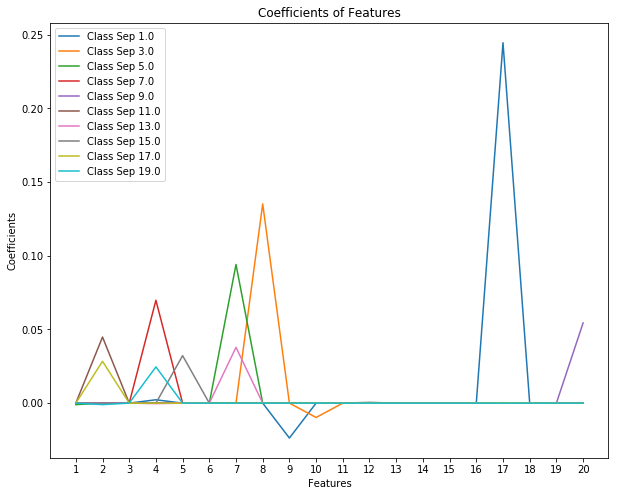

In [33]:
attributes = np.linspace(1,20,20)
plt.figure(figsize = (10,8))
plt.plot(attributes,coef1,label='Class Sep 1.0')
plt.plot(attributes,coef2,label='Class Sep 3.0')
plt.plot(attributes,coef3,label='Class Sep 5.0')
plt.plot(attributes,coef4,label='Class Sep 7.0')
plt.plot(attributes,coef5,label='Class Sep 9.0')
plt.plot(attributes,coef6,label='Class Sep 11.0')
plt.plot(attributes,coef7,label='Class Sep 13.0')
plt.plot(attributes,coef8,label='Class Sep 15.0')
plt.plot(attributes,coef9,label='Class Sep 17.0')
plt.plot(attributes,coef10,label='Class Sep 19.0')


plt.title('Coefficients of Features')
plt.xlabel('Features')
plt.xticks(attributes)
plt.ylabel('Coefficients')
plt.legend()

The plot above shows the coefficients of each feature returned by the models. It is apparent that as the class separation increases, the coefficients decrease. Additionally, it is shown that the coefficients will suddenly peak at a certain single feature.

The table below displays the coefficients more specifically in a table. This highlights the decreasing trend that is followed as the class separation increases.

In [34]:
coefs = np.vstack((attributes,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10)).transpose()
df3 = pd.DataFrame(coefs,columns = ['Features','Class_Sep 1.0','Class_Sep 3.0','Class_Sep 5.0','Class_Sep 7.0','Class_Sep 9.0','Class_Sep 11.0','Class_Sep 13.0','Class_Sep 15.0','Class_Sep 17.0','Class_Sep 19.0'])
df3 = df3.style.hide_index()
df3

Features,Class_Sep 1.0,Class_Sep 3.0,Class_Sep 5.0,Class_Sep 7.0,Class_Sep 9.0,Class_Sep 11.0,Class_Sep 13.0,Class_Sep 15.0,Class_Sep 17.0,Class_Sep 19.0
1,-0,0,-0.00101267,-0,0,0,-0,-0,0,-0
2,0,0,0,0,0,0.0448401,0,-0,0.0283932,-0.00101029
3,-0,0,0,0,-0,0,0,0,0,0
4,0.00227761,-0,0,0.0697902,-0,-0,-0.000351418,-0,0,0.0245717
5,0,0,0,0,0,0,-0,0.0322158,-0,-0
6,-0,-0,0,0,0,-0,0,-0,-0,-0
7,-0,0,0.0940581,-0,-0,-0,0.0378484,-0,-0,-0
8,-0,0.135173,0,-0,0,5.95699e-05,0,-0,0,0
9,-0.0236837,-0,-0,-0,-0,0,0,-0,0,-0
10,-0,-0.00973618,0,0,-0,0,-0,0,0,0


Lastly, I made plots for the MSEs for each test set on each fold, depending on the alpha values (MSE path). For each dataset, the average MSE across each fold decreases steadily as the alpha value increases. The plots look very similar in shape and form, with the exception of a few. However, for each plot, the scale of the y-axis gets increasingly smaller. This indicates that as the class separation value increases, the MSEs for each test set across the folds decreases. 

In [35]:
alphavalues = np.arange(0,1,0.02)

MSE Path for Class_Sep 1.0


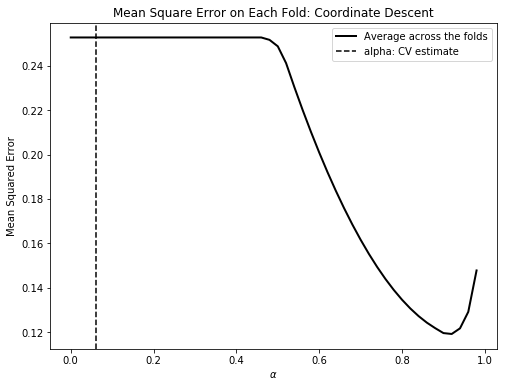

In [36]:
# DATASET 1
print('MSE Path for Class_Sep 1.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath1.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha1,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 3.0


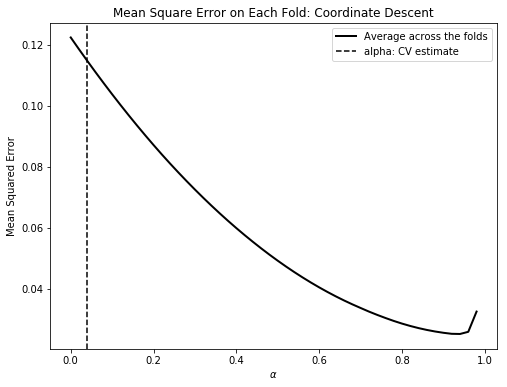

In [37]:
# DATASET 2
print('MSE Path for Class_Sep 3.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath2.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha2,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 5.0


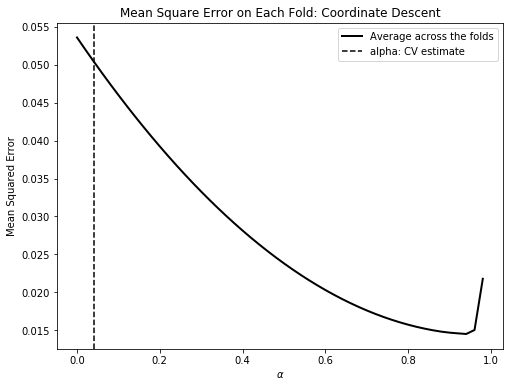

In [38]:
# DATASET 3
print('MSE Path for Class_Sep 5.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath3.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha3,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 7.0


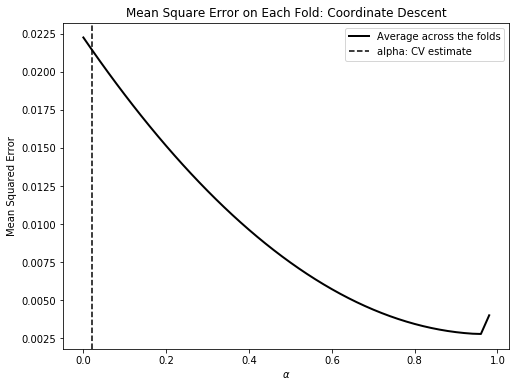

In [39]:
# DATASET 4
print('MSE Path for Class_Sep 7.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath4.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha4,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 9.0


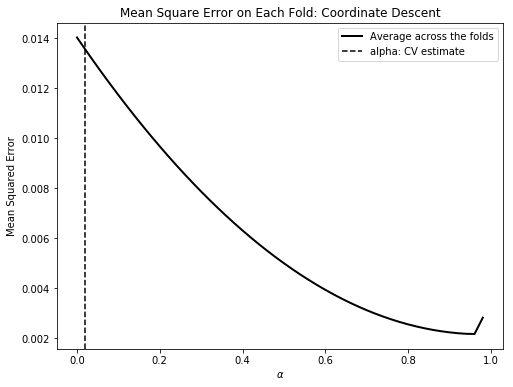

In [40]:
# DATASET 5
print('MSE Path for Class_Sep 9.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath5.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha5,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 11.0


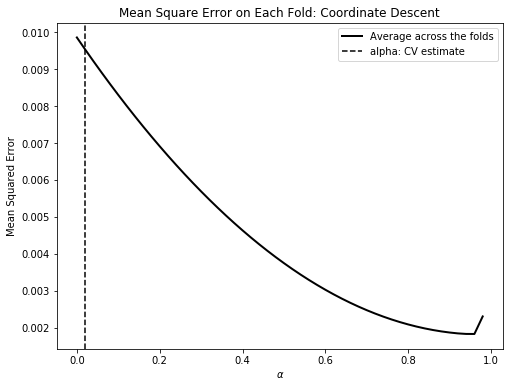

In [41]:
# DATASET 6
print('MSE Path for Class_Sep 11.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath6.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha6,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 13.0


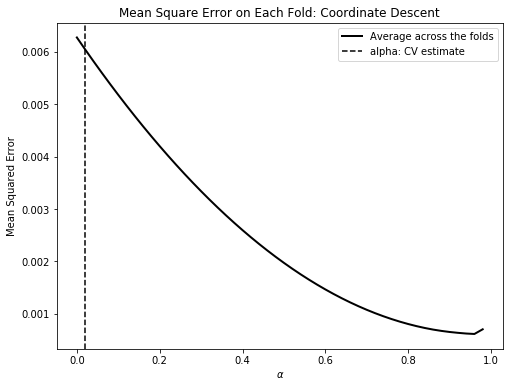

In [42]:
# DATASET 7
print('MSE Path for Class_Sep 13.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath7.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha7,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 15.0


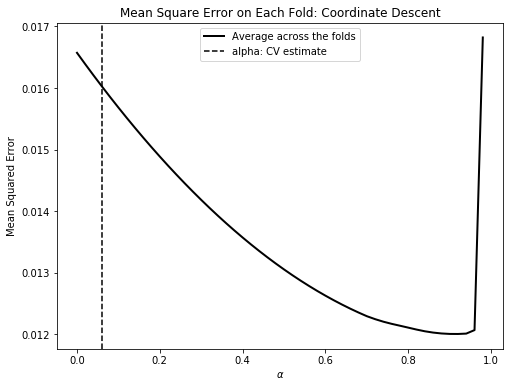

In [43]:
# DATASET 8
print('MSE Path for Class_Sep 15.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath8.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha8,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 17.0


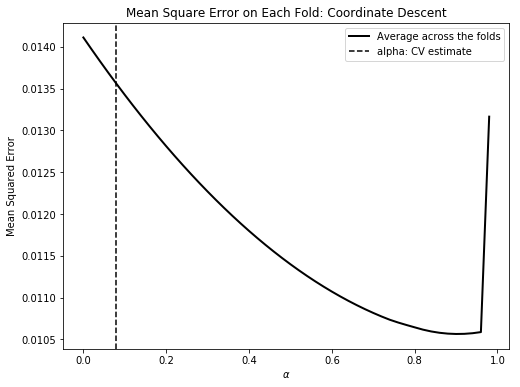

In [44]:
# DATASET 9
print('MSE Path for Class_Sep 17.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath9.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha9,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

MSE Path for Class_Sep 19.0


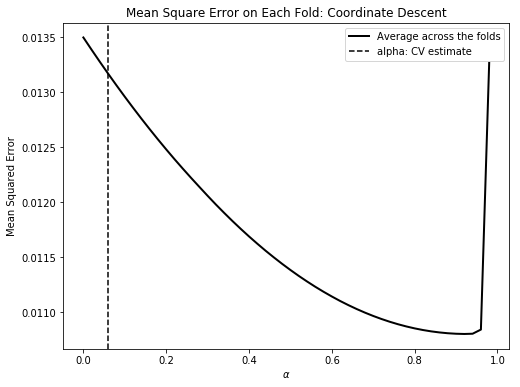

In [45]:
# DATASET 10
print('MSE Path for Class_Sep 19.0')
plt.figure(figsize=(8,6))
plt.plot(alphavalues,msepath10.mean(axis=-1),'k',
        label = 'Average across the folds',linewidth=2)
plt.axvline(alpha10,linestyle='--',color='k',
           label='alpha: CV estimate')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Mean Square Error on Each Fold: Coordinate Descent')
plt.show()

## Conclusion

From the results produced from the Lasso regression models, it was shown that with each dataset with an increased class separation, the coefficients and the mean-squared errors between the target variable and the predictions decreased. However, the class separation did not seem to have a noticeable or significant effect on the best chosen alpha value or the intercepts produced from the models. 

The best chosen alpha value for each of the datasets was fairly low, meaning the model determined it would be best to make predictions using a low amount of penalization. Overall, it seems fair to conclude that increasing the class separation value of the random datasets generated improves the performance of the Lasso regression model.